# Webscraping HM sale prices

In [ ]:
if (!require("rvest")) install.packages("rvest")
library("rvest")

We are going to read in a page at H&M for sales:

In [ ]:
# url<-"https://www2.hm.com/en_us/sale/women/tops.html?page-size=2448"
# url<-"https://www2.hm.com/en_us/sale/women/jackets-coats.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/shirts-blouses.html?page-size=252"
url<-"https://www2.hm.com/en_us/sale/women/dresses.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/maternity-wear.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/basics.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/shoes.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/jeans.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/swimwear.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/accessories.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/lingerie.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/view-all.html?page-size=2448"
# url<-"https://www2.hm.com/en_us/sale/women/pants.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/lingerie.html?page-size=2448"

webpage <- read_html(url)

Now we can identify the sale price:

In [ ]:
nodes <- html_nodes(webpage, ".sale")
sale <- html_text(nodes)
sale <- gsub("$ ","", sale, fixed=TRUE)
sale <- as.numeric(sale)
str(sale,20)

 num [1:201] 10.99 10.99 9.99 12.99 12.99 ...

Lets take a look at the first few values:

In [ ]:
head(sale,20)

 [1] 10.99 10.99  9.99 12.99 12.99  6.99  9.99  2.99  4.99  4.99  4.99  8.99
[13] 12.99 10.99  9.99 11.99  8.99 12.99 10.99 10.99

Now we can identify the name of the item:

In [ ]:
nodes <- html_nodes(webpage, ".item-heading .link")
name <- html_text(nodes)
str(name)

 chr [1:201] "Linen-blend Shirt Dress" "Button-front Jersey Dress" ...

Lets take a look at the first few values:

In [ ]:
head(name,20)

 [1] "Linen-blend Shirt Dress"    "Button-front Jersey Dress" 
 [3] "Terry T-shirt Dress"        "Wrap Dress"                
 [5] "Smocked Cotton Dress"       "Ribbed Bodycon Dress"      
 [7] "Cut-out Dress"              "Halterneck Bodycon Dress"  
 [9] "Bandeau Dress"              "Bandeau Dress"             
[11] "Bodycon Dress with Cut-out" "Button-front Jersey Dress" 
[13] "V-neck Slip Dress"          "Linen-blend Shirt Dress"   
[15] "Terry T-shirt Dress"        "Cut-out Dress"             
[17] "V-neck Dress"               "Smocked Dress"             
[19] "Knee-length Dress"          "Balloon-sleeved Dress"     

Now we identify the regular price:

In [ ]:
nodes <- html_nodes(webpage, ".regular")
price <- html_text(nodes)
price <- gsub("$","", price, fixed=TRUE)
price <- as.numeric(price)
str(price)

 num [1:201] 30 25 28 25 25 ...

Lets take a look at the first few values:

In [ ]:
head(price,20)

 [1] 29.99 24.99 27.99 24.99 24.99 17.99 24.99  5.99 12.99 12.99 14.99 24.99
[13] 29.99 29.99 27.99 24.99 19.99 29.99 19.99 29.99

Lets make a data frame with the `name`, `sale`, `price` and `discount`:

In [ ]:
discount <- round((price-sale)/price*100)
df<-data.frame(name,sale,price, discount)
head(df,20)

                         name  sale price discount
1     Linen-blend Shirt Dress 10.99 29.99       63
2   Button-front Jersey Dress 10.99 24.99       56
3         Terry T-shirt Dress  9.99 27.99       64
4                  Wrap Dress 12.99 24.99       48
5        Smocked Cotton Dress 12.99 24.99       48
6        Ribbed Bodycon Dress  6.99 17.99       61
7               Cut-out Dress  9.99 24.99       60
8    Halterneck Bodycon Dress  2.99  5.99       50
9               Bandeau Dress  4.99 12.99       62
10              Bandeau Dress  4.99 12.99       62
11 Bodycon Dress with Cut-out  4.99 14.99       67
12  Button-front Jersey Dress  8.99 24.99       64
13          V-neck Slip Dress 12.99 29.99       57
14    Linen-blend Shirt Dress 10.99 29.99       63
15        Terry T-shirt Dress  9.99 27.99       64
16              Cut-out Dress 11.99 24.99       52
17               V-neck Dress  8.99 19.99       55
18              Smocked Dress 12.99 29.99       57
19          Knee-length Dress 1

                          name  sale price discount
182 Puff-sleeved Brocade Dress 38.99 79.99       51
183               Fitted Dress 12.99 24.99       48
184          Calf-length Dress 24.99 49.99       50
185         Puff-sleeved Dress 27.99 59.99       53
186                 Lace Dress 33.99 49.99       32
187           Sleeveless Dress  8.99 17.99       50
188         Puff-sleeved Dress 29.99 59.99       50
189             Glittery Dress 16.99 34.99       51
190      Shimmery Fitted Dress 16.99 34.99       51
191 Lace Stand-up Collar Dress 38.99 79.99       51
192                 Mesh Dress 12.99 24.99       48
193 Lace Stand-up Collar Dress 45.99 79.99       43
194        Ribbed Jersey Dress  6.99 12.99       46
195                 Knit Dress 20.99 34.99       40
196             Gathered Dress 20.99 49.99       58
197       Draped Bodycon Dress 20.99 49.99       58
198       Gathered Satin Dress 11.99 29.99       60
199      Shimmery Fitted Dress 19.99 34.99       43
200         

Lets create a new data frame with the discounts sorted:

In [ ]:
dfnew <- df[order(df$discount),]
names(dfnew)<-NULL
head(dfnew,20)

                                             
165         Smock-detail Dress 19.99 24.99 20
124             Sequined Dress 54.99 69.99 21
95   Calf-length T-shirt Dress 14.99 19.99 25
122    H&M+ Button-front Dress 25.99 34.99 26
179          Slit-detail Dress 25.99 34.99 26
94       Long Halterneck Dress 35.99 49.99 28
175          H&M+ V-neck Dress 24.99 34.99 29
110      Flounce-trimmed Dress 20.99 29.99 30
158 H&M+ Flounce-trimmed Dress 20.99 29.99 30
79                Cotton Dress 16.99 24.99 32
186                 Lace Dress 33.99 49.99 32
33    Halterneck Bodycon Dress  3.99  5.99 33
51   Crochet-look Jersey Dress 11.99 17.99 33
74                Cotton Dress 11.99 17.99 33
75        Tie-belt Shirt Dress 19.99 29.99 33
92           Draped Slip Dress 11.99 17.99 33
130    Sleeveless Jersey Dress  9.99 14.99 33
42           Open-backed Dress 22.99 34.99 34
153               V-neck Dress 22.99 34.99 34
38           Long V-neck Dress 38.99 59.99 35

                                              
20        Balloon-sleeved Dress 10.99 29.99 63
71      Patterned Printed Dress 10.99 29.99 63
82  H&M+ Off-the-shoulder Dress 12.99 34.99 63
149               Cut-out Dress 10.99 29.99 63
3           Terry T-shirt Dress  9.99 27.99 64
12    Button-front Jersey Dress  8.99 24.99 64
15          Terry T-shirt Dress  9.99 27.99 64
131                Fitted Dress  6.99 19.99 65
11   Bodycon Dress with Cut-out  4.99 14.99 67
44    Lacing-detail Denim Dress 10.99 34.99 69
173       Flounce-trimmed Dress 10.99 34.99 69
39           Jersey Shirt Dress  8.99 29.99 70
54                  Terry Dress  5.99 19.99 70
120  Leopard-print Jersey Dress 29.99 99.00 70
138                V-neck Dress 17.99 59.99 70
148     Sleeveless Jersey Dress  2.99  9.99 70
164       Balloon-sleeved Dress 17.99 59.99 70
174               Bodycon Dress  8.99 29.99 70
133              Collared Dress  9.99 34.99 71
43         Smocked Cotton Dress  6.99 24.99 72

Lets take a look at a histogram of the discounts:

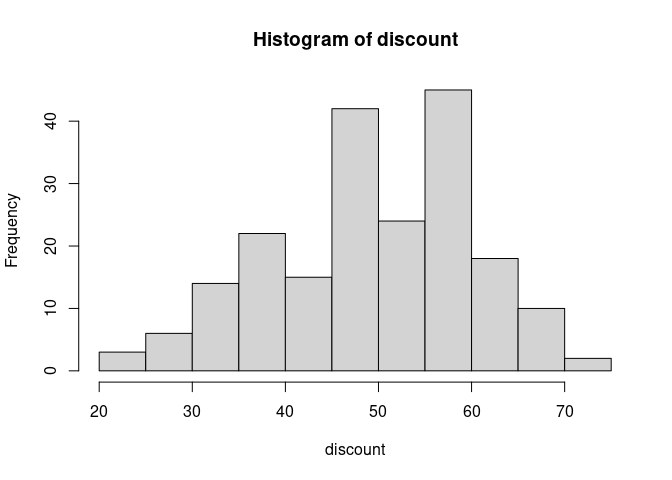

In [ ]:
hist(discount)

In [ ]:
range(discount)

[1] 20 72

[1] 50.03483

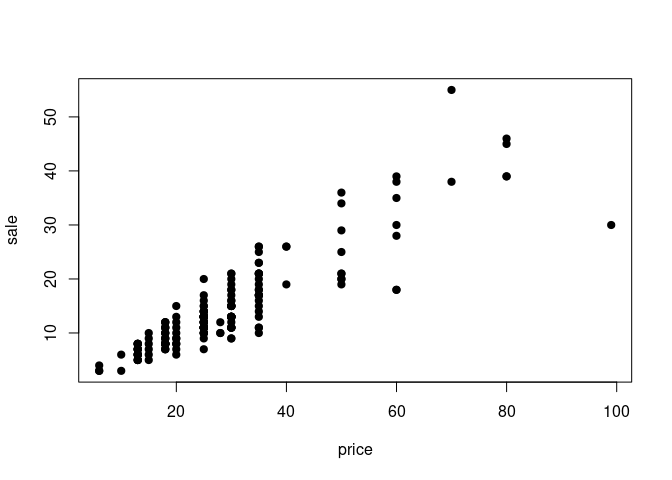

[1] 0.8866348

In [ ]:
plot(price, sale, pch=19)